In [277]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np          


In [278]:
data = pd.read_csv("dataset.csv") #reading CSV file
data.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [279]:
data.info()  #Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [280]:
data.describe()  

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


DATA CLEANING

In [281]:
data.isnull().sum() #checking null values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [282]:
data = data.drop(['City','Date','Time','Invoice ID'],axis=1)   #dropping unnecessary attributes

In [283]:
data['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

DATA VISUALIZATION

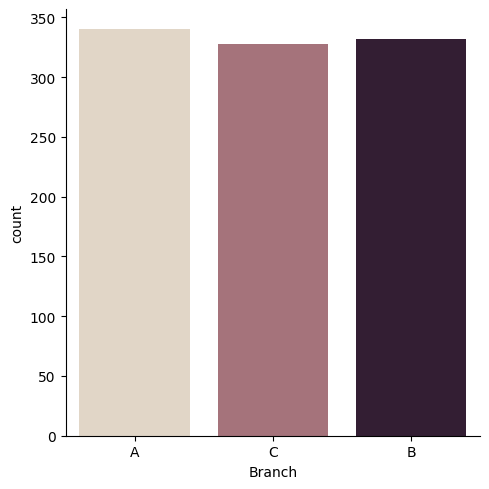

In [284]:
sns.catplot(x="Branch", kind="count", palette="ch:.25", data=data)  

In [285]:
data['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

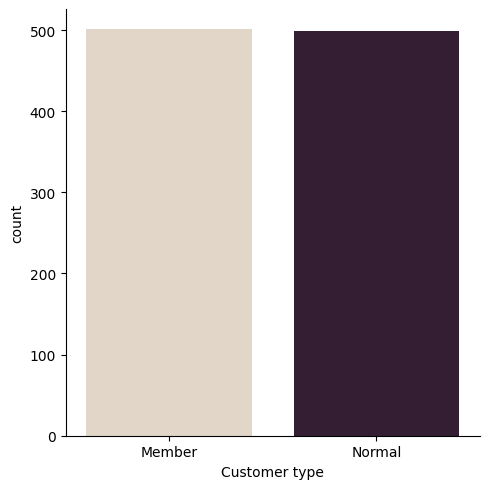

In [286]:
sns.catplot(x="Customer type", kind="count", palette="ch:.25", data=data)

In [287]:
data['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

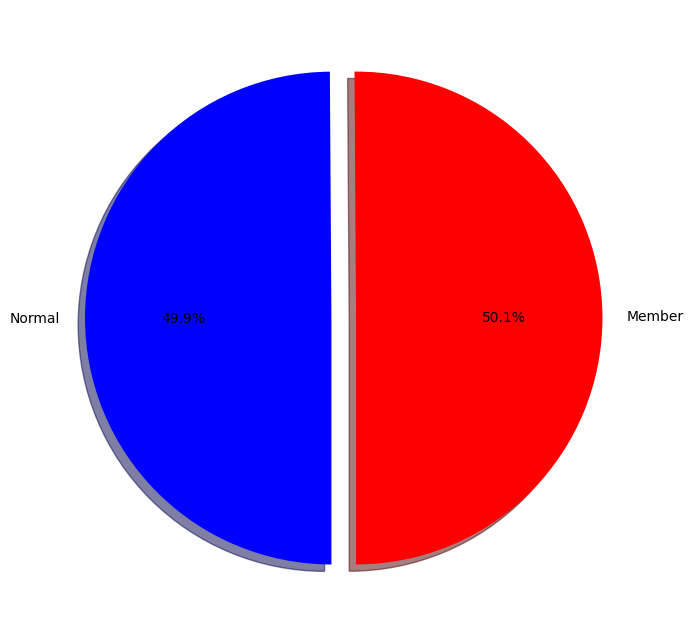

In [288]:
size = data['Customer type'].value_counts(sort=True)
colors = ['Red','Blue']
labels = ['Member','Normal']
explode = (0,0.1)
plt.figure(figsize=(10 , 8))
plt.pie(size,colors=colors,autopct='%1.1f%%',shadow=True,startangle = 270 ,explode= explode, labels=labels)

plt.show()

<AxesSubplot: xlabel='Customer type', ylabel='count'>

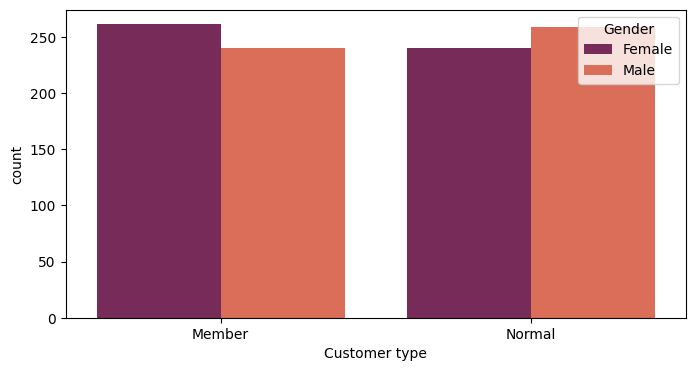

In [289]:
plt.figure(figsize=(8,4))
sns.countplot(x='Customer type', data= data, palette= "rocket",hue = "Gender")

In [290]:
data['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

<AxesSubplot: xlabel='Payment', ylabel='count'>

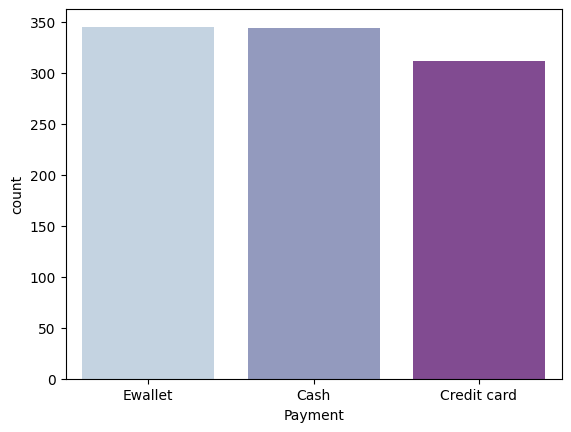

In [291]:
sns.countplot(x=data['Payment'],data=data,palette='BuPu')

C:\Users\DELL\AppData\Local\Temp\ipykernel_7460\3758334093.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<AxesSubplot: >

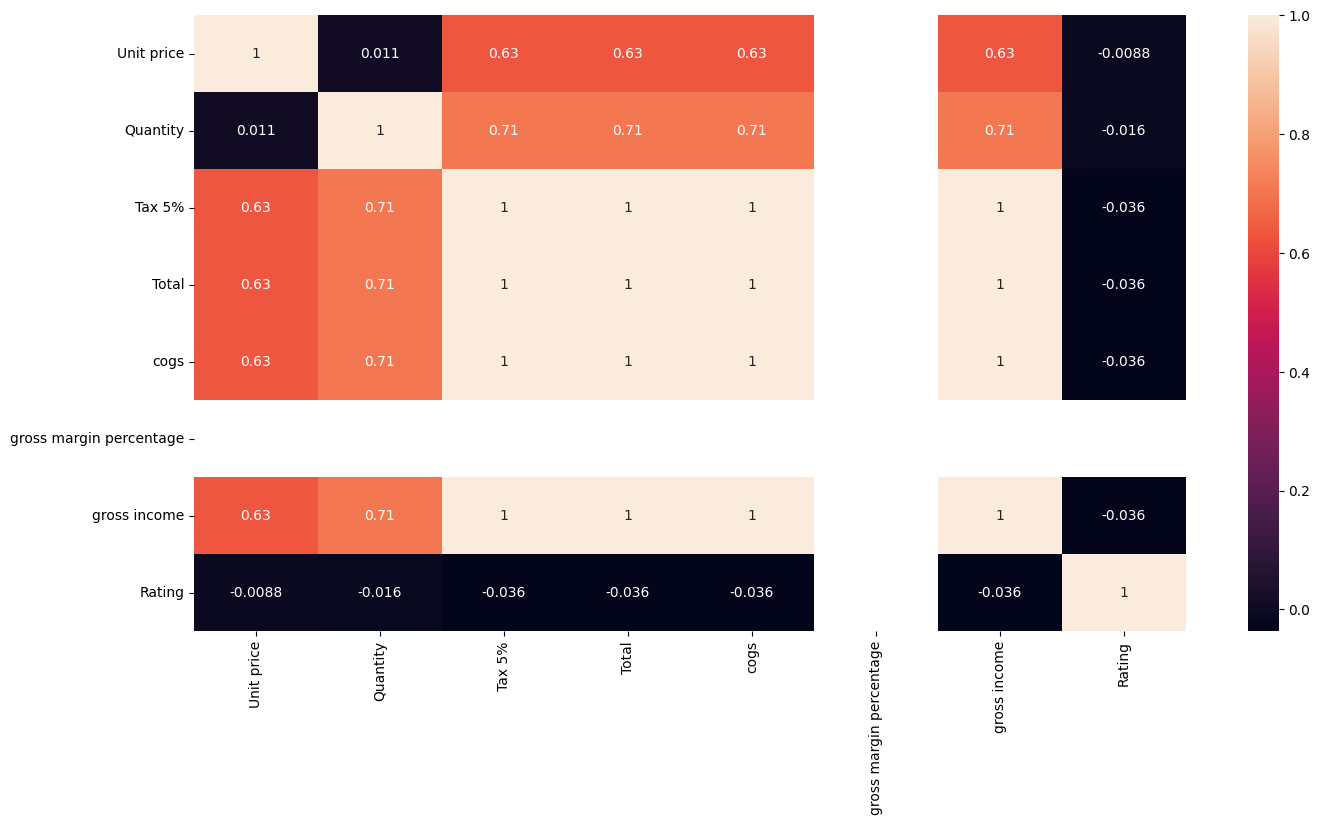

In [292]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True)

In [293]:
data.head()

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3


In [294]:
# categorical data
[i for i in data.columns if data[i].dtype == 'object']
data = pd.get_dummies(data,drop_first=True)

In [295]:
#Feature Engineering 

data['TotalbyQuantity'] = data['Total'] / data['Quantity']

In [296]:
# Standardizing the numerical variables
num = data[['Unit price','Quantity','Tax 5%','Total','cogs','gross margin percentage','gross income','Rating','TotalbyQuantity']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num = scaler.fit_transform(num)
num = pd.DataFrame(num,columns=['Unit price','Quantity','Tax 5%','Total','cogs','gross margin percentage','gross income','Rating','TotalbyQuantity'])
num

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,TotalbyQuantity
0,0.718847,0.666667,0.521616,0.521616,0.521616,0.0,0.521616,0.850000,0.718847
1,0.057855,0.444444,0.067387,0.067387,0.067387,0.0,0.067387,0.933333,0.057855
2,0.403316,0.666667,0.319628,0.319628,0.319628,0.0,0.319628,0.566667,0.403316
3,0.535603,0.777778,0.463549,0.463549,0.463549,0.0,0.463549,0.733333,0.535603
4,0.848131,0.666667,0.604377,0.604377,0.604377,0.0,0.604377,0.216667,0.848131
...,...,...,...,...,...,...,...,...,...
995,0.336782,0.000000,0.030707,0.030707,0.030707,0.0,0.030707,0.366667,0.336782
996,0.971295,1.000000,0.980465,0.980465,0.980465,0.0,0.980465,0.066667,0.971295
997,0.242101,0.000000,0.022049,0.022049,0.022049,0.0,0.022049,0.616667,0.242101
998,0.620160,0.000000,0.056622,0.056622,0.056622,0.0,0.056622,0.016667,0.620160


In [297]:
data=data.drop(['Unit price','Quantity','Tax 5%','Total','cogs','gross margin percentage','gross income','Rating','TotalbyQuantity'],axis=1)
data = pd.concat([data,num],axis=1)
data.head()

,Branch_B,Branch_C,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,TotalbyQuantity
0,0,0,0,0,0,0,1,0,0,0,1,0.718847,0.666667,0.521616,0.521616,0.521616,0.0,0.521616,0.850000,0.718847
1,0,1,1,0,0,0,0,0,0,0,0,0.057855,0.444444,0.067387,0.067387,0.067387,0.0,0.067387,0.933333,0.057855
2,0,0,1,1,0,0,0,1,0,1,0,0.403316,0.666667,0.319628,0.319628,0.319628,0.0,0.319628,0.566667,0.403316
3,0,0,0,1,0,0,1,0,0,0,1,0.535603,0.777778,0.463549,0.463549,0.463549,0.0,0.463549,0.733333,0.535603
4,0,0,1,1,0,0,0,0,1,0,1,0.848131,0.666667,0.604377,0.604377,0.604377,0.0,0.604377,0.216667,0.848131


In [298]:

#Splitting Datas
X = data.drop(['Total'],axis=1)
y = data['Total']
X.columns

Index(['Branch_B', 'Branch_C', 'Customer type_Normal', 'Gender_Male',
       'Product line_Fashion accessories', 'Product line_Food and beverages',
       'Product line_Health and beauty', 'Product line_Home and lifestyle',
       'Product line_Sports and travel', 'Payment_Credit card',
       'Payment_Ewallet', 'Unit price', 'Quantity', 'Tax 5%', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'TotalbyQuantity'],
      dtype='object')

In [299]:
# SPLITTING DATA FOR TRAIN AND TEST SEPARATELY
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.45,random_state=42)

In [300]:
X_test.shape

(450, 19)

In [301]:
y_train.shape

(550,)

In [302]:
#Fitting Model
from sklearn.linear_model import LinearRegression
#Scoring function
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


regr = LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)

print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred)) #differences between the predicted values and the actual or observed values
print("Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,y_pred)))  


Mean Absolute Error:  2.766477747633476e-16
Mean Squared Error:  3.447164549321483e-16
